In [6]:
!pip install pyspark


In [7]:
from google.colab import files
uploaded = files.upload()  # Upload your dataset here


Saving data.csv to data (2).csv


In [35]:
# Install Java
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download Spark with alternative URL
import os
spark_tarball = "spark-3.5.3-bin-hadoop3.tgz"
if not os.path.exists(spark_tarball):
    !wget -q https://archive.apache.org/dist/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz

# Extract Spark if the tarball exists
if os.path.exists(spark_tarball):
    !tar xf spark-3.5.3-bin-hadoop3.tgz
else:
    raise FileNotFoundError(f"Failed to download {spark_tarball}. Please check your internet connection or try a different mirror.")

# Install findspark
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.3-bin-hadoop3"

# Initialize Spark
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MySparkApp").getOrCreate()

# Upload and load dataset
from google.colab import files
# Uncomment the line below to upload your dataset manually
# uploaded = files.upload()

dataset_path = "/content/data.csv"  # Adjust path if needed
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"The file {dataset_path} does not exist. Please upload it using files.upload().")

# Load the dataset
df = spark.read.csv(dataset_path, header=True, inferSchema=True)
df.show()


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
+---------+---------+--------------------+--------+--------------+----

In [10]:
#Upload and load dataset
from google.colab import files
# Uncomment the line below to upload your dataset manually
# uploaded = files.upload()

dataset_path = "/content/data.csv"  # Adjust path if needed
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"The file {dataset_path} does not exist. Please upload it using files.upload().")

# Load the dataset
df = spark.read.csv(dataset_path, header=True, inferSchema=True)
df.show()


+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

In [11]:
df.printSchema()


root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



In [37]:
df.describe().show()


+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|          Quantity|    InvoiceDate|        UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|  count|            541909|            541909|              540455|            541909|         541909|           541909|            406829|     541909|
|   mean|  559965.752026781|27623.240210938104|             20713.0|  9.55224954743324|           null|4.611113626082972|15287.690570239585|       null|
| stddev|13428.417280800133| 16799.73762842775|                null|218.08115785023486|           null| 96.7598530611797| 1713.600303321594|       null|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|            -8

In [13]:
df_clean = df.dropna()


In [16]:
from pyspark.sql.functions import col

df_clean = df_clean.withColumn('Total Revenue', col('Quantity') * col('UnitPrice'))


In [20]:
df

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: int, Country: string]

In [1]:
!wget -q https://dlcdn.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz
!tar xf spark-3.5.3-bin-hadoop3.tgz


In [2]:
import os

os.environ["SPARK_HOME"] = "/content/spark-3.5.3-bin-hadoop3"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("BigDataProject") \
    .getOrCreate()

print("Spark version:", spark.version)


Spark version: 3.5.3


In [14]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

# Assemble features into a vector
assembler = VectorAssembler(inputCols=["Quantity", "UnitPrice"], outputCol="features")
df_features = assembler.transform(df_clean)

# Apply KMeans
kmeans = KMeans(featuresCol="features", k=3, seed=1)
model = kmeans.fit(df_features)

# Make predictions
predictions = model.transform(df_features)

# Show predictions
predictions.show()


+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-----------+----------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|   features|prediction|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-----------+----------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom| [6.0,2.55]|         0|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom| [6.0,3.39]|         0|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom| [8.0,2.75]|         0|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom| [6.0,3.39]|         0|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom| [6.0,3.39]|    

In [27]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col

# Assuming df_clean is your DataFrame

# Step 1: Assemble the features into a vector column
assembler = VectorAssembler(inputCols=["Quantity"], outputCol="features")
assembled_data = assembler.transform(df_clean)

# Step 2: Split the data into training and test sets
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

# Step 3: Initialize the Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='UnitPrice')

# Step 4: Fit the model
lr_model = lr.fit(train_data)

# Step 5: Predict using the test data
lr_predictions = lr_model.transform(test_data)

# Show predictions
lr_predictions.show()


+---------+---------+--------------------+--------+--------------+---------+----------+--------------+------------------+--------+------------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|     Total Revenue|features|        prediction|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+------------------+--------+------------------+
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|             20.34|   [6.0]|3.3576023629245735|
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|15.299999999999999|   [6.0]|3.3576023629245735|
|   536366|    22633|HAND WARMER UNION...|       6|12/1/2010 8:28|     1.85|     17850|United Kingdom|11.100000000000001|   [6.0]|3.3576023629245735|
|   536367|    22622|BOX OF VINTAGE AL...|       2|12/1/2010 8:34|     9.95|     13047|United Kingdo

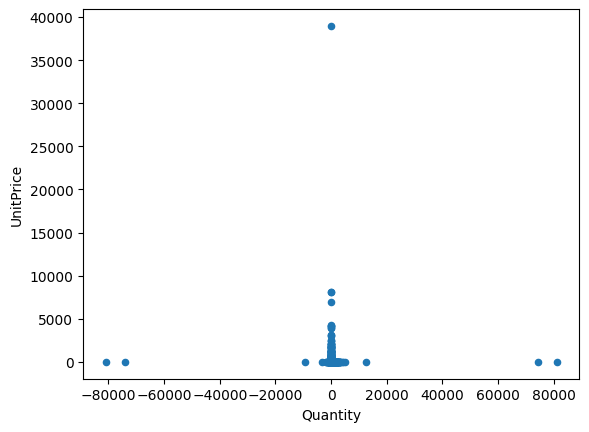

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame
pandas_df = df_clean.toPandas()

# Plot data
pandas_df.plot(kind='scatter', x='Quantity', y='UnitPrice')
plt.show()


In [40]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.sql.functions import col

# Indexing categorical columns (if any)
country_indexer = StringIndexer(inputCol="Country", outputCol="CountryIndex")
stockcode_indexer = StringIndexer(inputCol="StockCode", outputCol="StockCodeIndex")

# Apply transformations to the dataframe
df_clean = country_indexer.fit(df_clean).transform(df_clean)
df_clean = stockcode_indexer.fit(df_clean).transform(df_clean)

# Create interaction features if needed (example: Quantity * UnitPrice)
df_clean = df_clean.withColumn("Quantity_Price", col("Quantity") * col("UnitPrice"))

# Assemble features into a vector
assembler = VectorAssembler(
    inputCols=['Quantity', 'CountryIndex', 'StockCodeIndex', 'Quantity_Price'],  # Example feature columns
    outputCol='features'
)

assembled_data = assembler.transform(df_clean)


In [48]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, count, avg, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors
from pyspark.ml.evaluation import ClusteringEvaluator

# Start Spark session
spark = SparkSession.builder.appName("CustomerSegmentation").getOrCreate()

# Load your data
df_clean = spark.read.csv("/content/data.csv", header=True, inferSchema=True)

# Assuming df_clean is already loaded and cleaned

# 1. Aggregate the customer data
df_customer = df_clean.groupBy("CustomerID").agg(
    sum("Quantity").alias("TotalQuantity"),
    sum(col("Quantity") * col("UnitPrice")).alias("TotalSpending"),  # Corrected multiplication
    count("InvoiceNo").alias("PurchaseFrequency"),
    avg("UnitPrice").alias("AvgUnitPrice")
)

# 2. Assemble features into a vector
feature_columns = ["TotalQuantity", "TotalSpending", "PurchaseFrequency", "AvgUnitPrice"]

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_customer_assembled = assembler.transform(df_customer)

# 3. Perform K-means clustering
kmeans = KMeans(k=5, seed=1, featuresCol="features", predictionCol="prediction")

# Fit the model
model = kmeans.fit(df_customer_assembled)

# Make predictions
df_customer_segments = model.transform(df_customer_assembled)

# 4. Evaluate clustering performance using Silhouette Score
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(df_customer_segments)
print(f"Silhouette Score = {silhouette_score}")

# 5. Drop 'features' column and save the segmented data
df_customer_segments_without_features = df_customer_segments.drop("features")

# Save the segmented data to CSV
df_customer_segments_without_features.write.csv("segmented_customers.csv", header=True)

# Stop Spark session when done
spark.stop()


Silhouette Score = 0.9895899672569106
